<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: Mariya Mansurova, Analyst & developer in Yandex.Metrics team. Translated by Ivan Zakharov, ML enthusiast. <br>This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #9 (demo)
## <center> Time series analysis

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis) + [solution](https://www.kaggle.com/kashnitsky/a9-demo-time-series-analysis-solution).**

**Fill cells marked with "Your code here" and submit your answers to the questions through the [web form](https://docs.google.com/forms/d/1UYQ_WYSpsV3VSlZAzhSN_YXmyjV7YlTP8EYMg8M8SoM/edit).**

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.14.3


## Data preparation

In [2]:
df = pd.read_csv('../../data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [3]:
df.shape

(383, 7)

## Predicting with FB Prophet

We will train at first 5 months and predict the number of trips for June. - wrong

In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
plotly_df(df.set_index('date')[['count']])

In [8]:
from fbprophet import Prophet

In [9]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


**<font color='red'>Question 1:</font>** What is the prediction of the number of views of the wiki page on January 20? Round to the nearest integer.

- 4947
- **3426**
- 5229
- 2744

In [11]:
# train_df = df[(df.ds >= pd.Timestamp('2015-01-01')) & (df.ds <= pd.Timestamp('2015-05-31'))]
# train_df

train_df = df[:-predictions].copy()
train_df

,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534


In [12]:
prophet = Prophet()
prophet.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
test_df = prophet.make_future_dataframe(periods=predictions)
test_df

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19


In [14]:
forecast = prophet.predict(test_df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2156.554478,2076.321431,2895.454878,2156.554478,2156.554478,326.990030,326.990030,326.990030,326.990030,326.990030,326.990030,0.0,0.0,0.0,2483.544508
1,2015-01-02,2159.400682,1729.878969,2572.677588,2159.400682,2159.400682,7.105028,7.105028,7.105028,7.105028,7.105028,7.105028,0.0,0.0,0.0,2166.505710
2,2015-01-03,2162.246886,897.277044,1697.596407,2162.246886,2162.246886,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,0.0,0.0,0.0,1300.580631
3,2015-01-04,2165.093090,1053.671900,1873.545855,2165.093090,2165.093090,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,0.0,0.0,0.0,1444.407112
4,2015-01-05,2167.939294,2042.008724,2842.569510,2167.939294,2167.939294,281.426215,281.426215,281.426215,281.426215,281.426215,281.426215,0.0,0.0,0.0,2449.365508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2016-01-16,2971.125440,1696.096462,2529.882344,2951.423847,2990.566578,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,-861.666255,0.0,0.0,0.0,2109.459185
379,2016-01-17,2976.423576,1844.093841,2670.731096,2955.265870,2996.957728,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,-720.685978,0.0,0.0,0.0,2255.737598
380,2016-01-18,2981.721713,2847.464512,3674.982074,2958.960793,3003.866499,281.426215,281.426215,281.426215,281.426215,281.426215,281.426215,0.0,0.0,0.0,3263.147928
381,2016-01-19,2987.019849,3143.289440,3933.566570,2963.155703,3010.604593,541.366440,541.366440,541.366440,541.366440,541.366440,541.366440,0.0,0.0,0.0,3528.386289


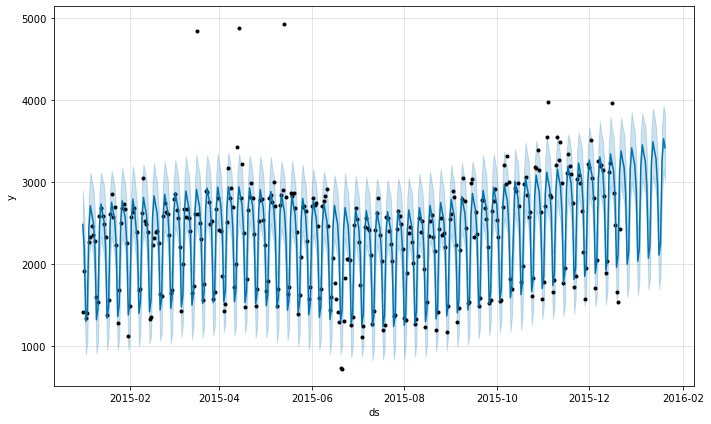

In [15]:
prophet.plot(forecast);

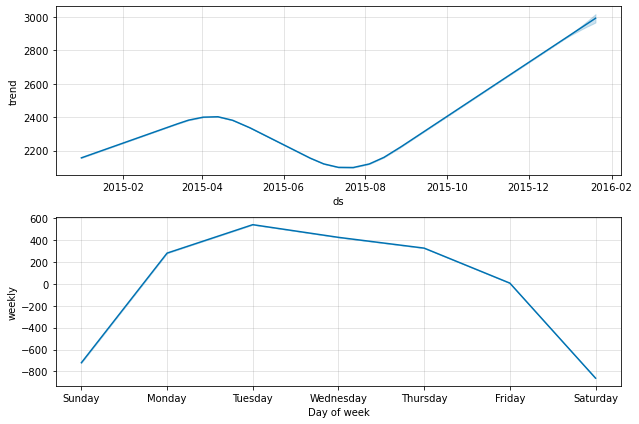

In [16]:
prophet.plot_components(forecast);

In [17]:
forecast[forecast.ds == '2016-01-20'].yhat

382    3417.782506
Name: yhat, dtype: float64

In [18]:
df[df.ds == '2016-01-20'].y

372    3559
Name: y, dtype: int64

Estimate the quality of the prediction with the last 30 points.

In [19]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [20]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2015-01-01,2483.544508,2076.321431,2895.454878,1414
2015-01-02,2166.505710,1729.878969,2572.677588,1920
2015-01-03,1300.580631,897.277044,1697.596407,1338
2015-01-04,1444.407112,1053.671900,1873.545855,1404
2015-01-05,2449.365508,2042.008724,2842.569510,2264
...,...,...,...,...
2016-01-16,2109.459185,1696.096462,2529.882344,1644
2016-01-17,2255.737598,1844.093841,2670.731096,1836
2016-01-18,3263.147928,2847.464512,3674.982074,2983


In [21]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [22]:
calculate_forecast_errors(cmp_df, prediction_size=predictions)

{'MAPE': 34.19380159794991, 'MAE': 593.3705390372357}

**<font color='red'>Question 2:</font> What is MAPE equal to?**

- **34.5**
- 42.42
- 5.39
- 65.91

**<font color='red'>Question 3:</font> What is MAE equal to?**

- 355
- 4007
- **600**
- 903

## Predicting with ARIMA

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**<font color='red'>Question 4:</font> Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?**

- Series is stationary, p_value = 0.107
- Series is not stationary, p_value = 0.107
- **Series is stationary, p_value = 0.001**
- Series is not stationary, p_value = 0.001

In [34]:
# arima_df = df.set_index('ds').asfreq('d')
# arima_df.isna().sum()

y    2
dtype: int64

In [36]:
# arima_df = arima_df.fillna(method='ffill')

In [37]:
# from sklearn.model_selection import train_test_split

# arima_train, arima_test = train_test_split(arima_df, test_size=predictions, shuffle=False)
# arima_train

,y
ds,
2015-01-01,1414.0
2015-01-02,1920.0
2015-01-03,1338.0
2015-01-04,1404.0
2015-01-05,2264.0
...,...
2015-12-17,2870.0
2015-12-18,2475.0
2015-12-19,1659.0


In [42]:
train_df

,ds,y
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534


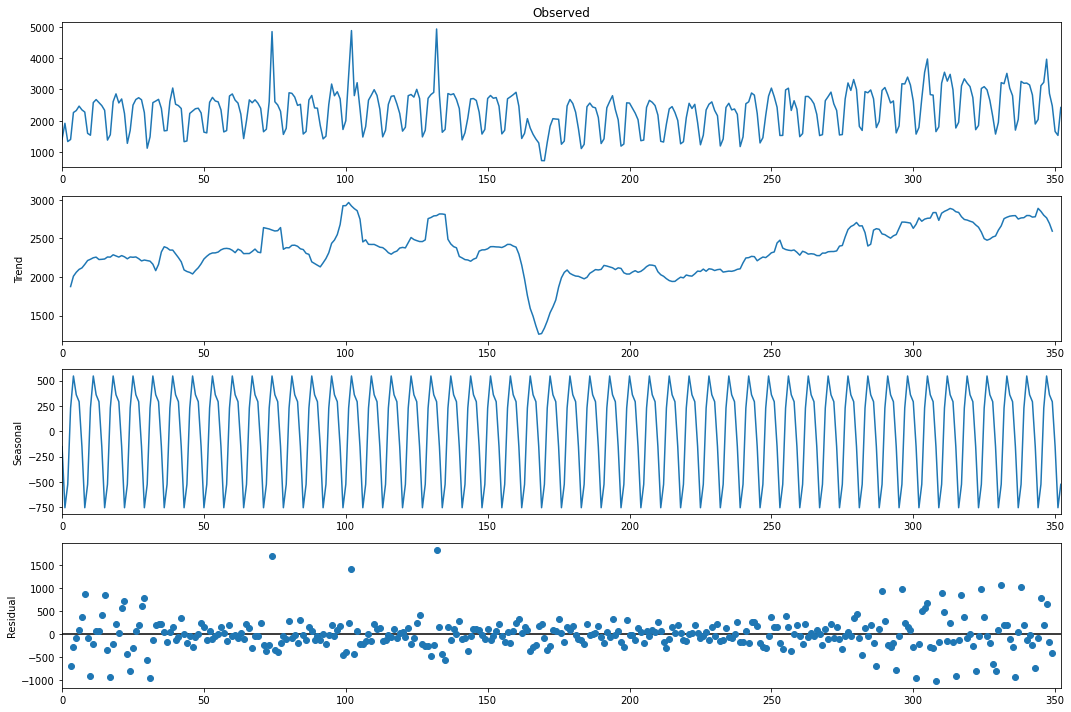

In [44]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();

In [28]:
print("Dickey-Fuller criterion: p=%f" % 
      sm.tsa.stattools.adfuller(arima_df['y'])[1])

Dickey-Fuller criterion: p=0.011513


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> <font color='red'>Question 5:</font> What parameters are the best for the model according to the `AIC` criterion?**

- D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1
- D = 2, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 1, d = 1, Q = 1, q = 2, P = 3, p = 1
- D = 0, d = 0, Q = 0, q = 2, P = 3, p = 1

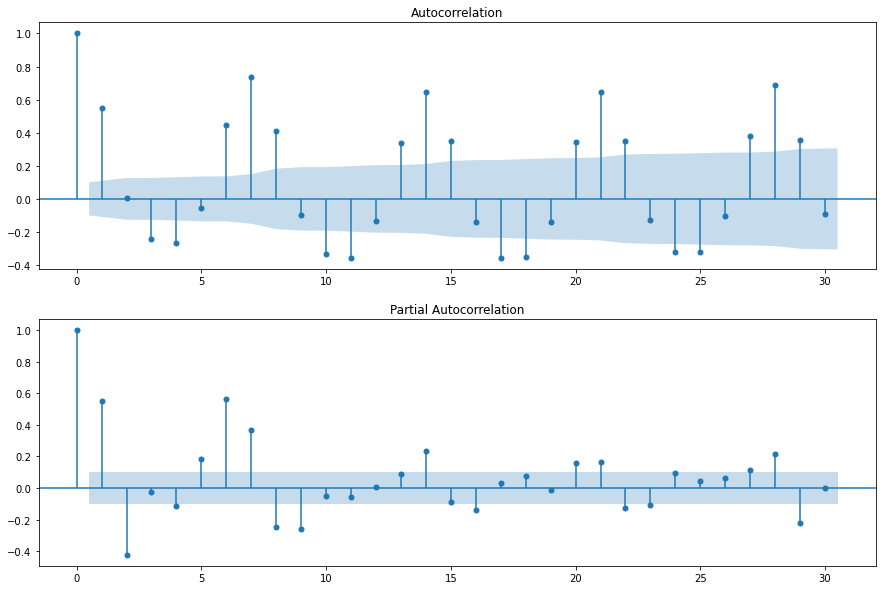

In [198]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(arima_df['y'].values.squeeze(), 
                         lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(arima_df['y'].values.squeeze(), 
                          lags=30, ax=ax);

Dickey-Fuller criterion: p=0.000000


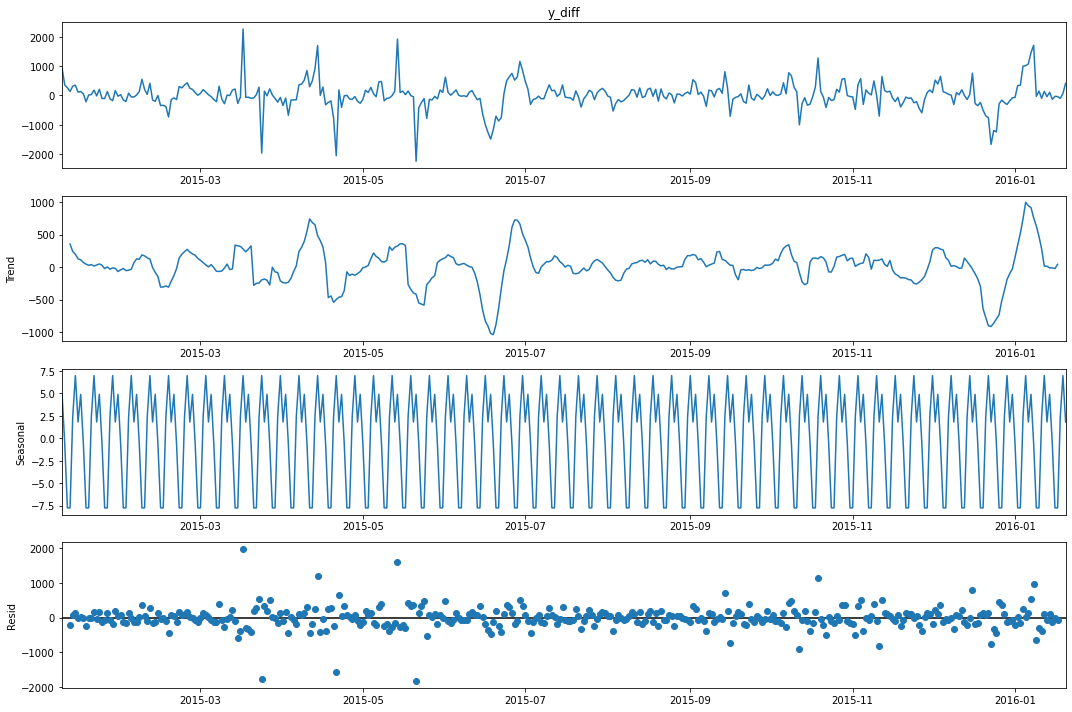

In [200]:
arima_df['y_diff'] = arima_df['y'] - arima_df['y'].shift(7)
sm.tsa.seasonal_decompose(arima_df['y_diff'][7:]).plot()
print("Dickey-Fuller criterion: p=%f" % 
      sm.tsa.stattools.adfuller(arima_df['y_diff'][7:])[1])

Dickey-Fuller criterion: p=0.000000


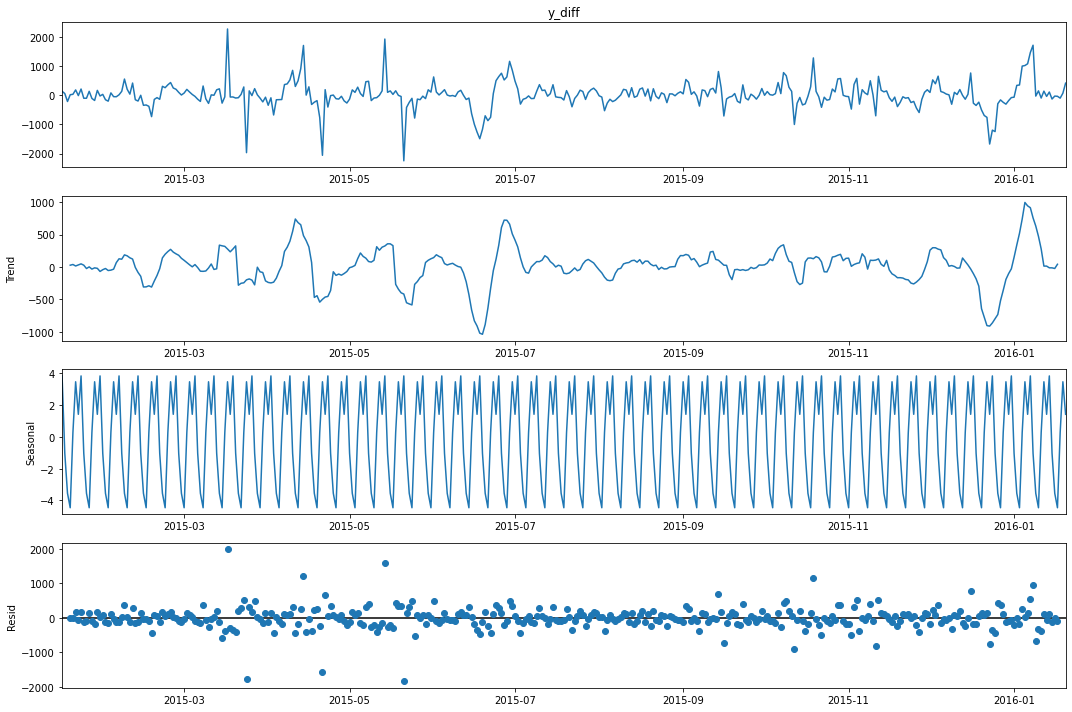

In [206]:
arima_df['y_diff2'] = arima_df['y_diff'] - arima_df['y_diff'].shift(7)
sm.tsa.seasonal_decompose(arima_df['y_diff'][14:]).plot()
print("Dickey-Fuller criterion: p=%f" % 
      sm.tsa.stattools.adfuller(arima_df['y_diff'][14:])[1])

Dickey-Fuller criterion: p=0.000000


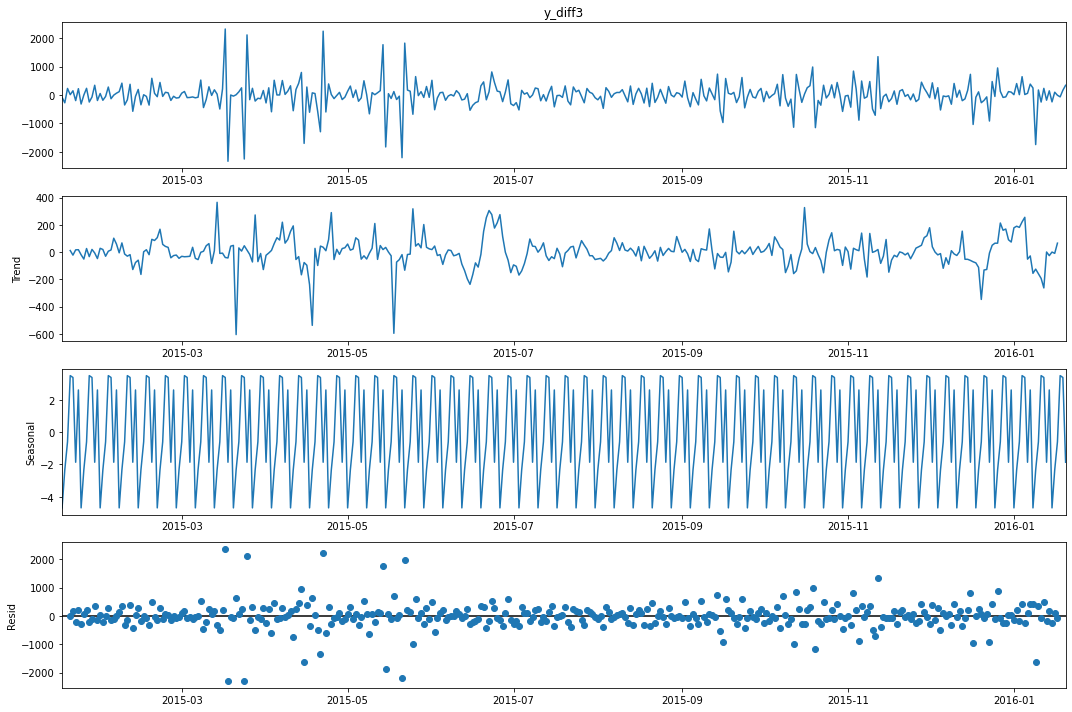

In [207]:
arima_df['y_diff3'] = arima_df['y_diff'] - arima_df['y_diff'].shift(1)
sm.tsa.seasonal_decompose(arima_df['y_diff3'][15:]).plot()
print("Dickey-Fuller criterion: p=%f" % 
      sm.tsa.stattools.adfuller(arima_df['y_diff3'][15:])[1])

D = 2, d = 1

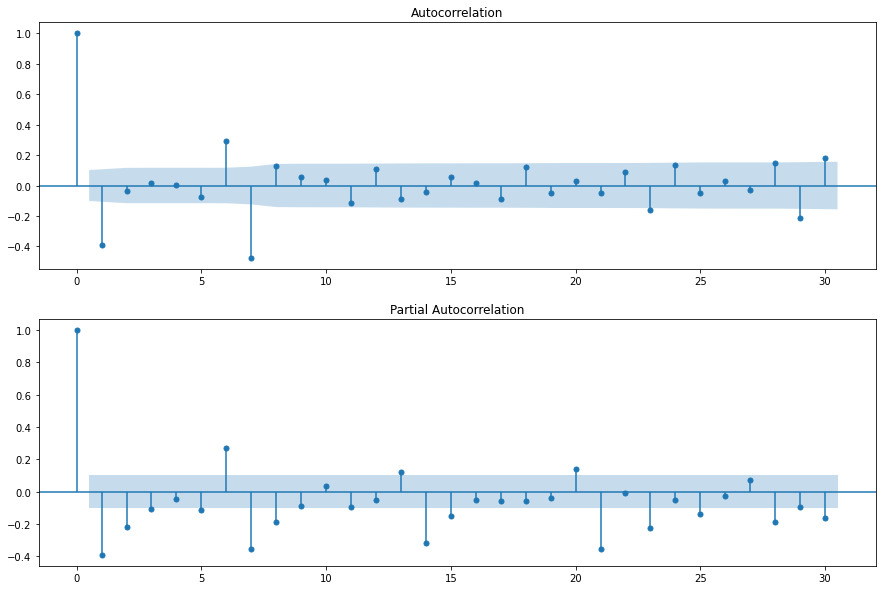

In [208]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(arima_df['y_diff3'][15:].values.squeeze(), 
                         lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(arima_df['y_diff3'][15:].values.squeeze(), 
                          lags=30, ax=ax);

Q = 1, q = 6, P = 3, p = 6 ???